In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import get_works_from_years

In [2]:
# Get data
df = get_works_from_years(start_year=2013, end_year=2023)

# Data Types

In [3]:
df.dtypes

title             object
type              object
citations         object
published_date    object
updated_date      object
text              object
url               object
dtype: object

Will convert these to be more specific in handling of each feature below.

# Null Values

In [4]:
df = df.replace("", None)
na = df.isna()
round(na.mean(), 2)

title             0.00
type              0.94
citations         1.00
published_date    0.00
updated_date      0.00
text              0.01
url               0.00
dtype: float64

# Duplicates

We only care about knowing of duplicates in the text we will be using to train our model, so we need only check the column `text`.

In [5]:
def find_duplicates(df: pd.DataFrame, feature: str) -> pd.DataFrame:
    assert feature in df.columns, f"{feature} is not a feature in DataFrame."
    duplicate_values = df[df[feature].duplicated() & df[feature].notna() & (df[feature] != "")][feature]
    duplicates = df[df[feature].isin(duplicate_values)].sort_values(feature)
    return duplicates

In [6]:
find_duplicates(df, "text")

,title,type,citations,published_date,updated_date,text,url
id,,,,,,,
17897440,The Role of Persistent Organic Pollutants in O...,None,None,2022-01-01T00:00:00,2023-03-26T18:35:46,"Citation: Aaseth, J.; Javorac...",https://core.ac.uk/download/511303485.pdf
139945166,The Role of Persistent Organic Pollutants in O...,None,None,2022-01-01T00:00:00,2023-03-02T22:21:18,"Citation: Aaseth, J.; Javorac...",https://core.ac.uk/download/554651010.pdf
46207646,The Impact of the Quality of Nutrition and Lif...,None,None,2022-02-28T00:00:00,2023-02-11T02:48:35,"Citation: Gama, M.I.; Pinto, ...",https://core.ac.uk/download/516521871.pdf
45586099,The Impact of the Quality of Nutrition and Lif...,None,None,2022-01-01T00:00:00,2023-04-05T02:05:43,"Citation: Gama, M.I.; Pinto, ...",https://core.ac.uk/download/491626104.pdf
128452118,Metabolomic Approaches for Detection and Ident...,None,None,2022-01-01T00:00:00,2023-02-11T02:52:47,"Citation: di Meo, N.A.; Loizz...",https://core.ac.uk/download/541259738.pdf
...,...,...,...,...,...,...,...
139839320,"Estimates, trends, and drivers of the global b...",None,None,2022-01-01T00:00:00,2022-10-29T09:46:07,www.thelancet.com/planetary-health Vol 6 J...,https://core.ac.uk/download/541476606.pdf
130735351,Special Issue on “fruit metabolism and metabol...,None,None,2020-06-01T01:00:00,2022-11-13T00:36:32,"Metabolites 2020, 10, 230; doi:10.3390/metabo...",https://core.ac.uk/download/326023166.pdf
11182681,Special Issue on “fruit metabolism and metabol...,None,None,2020-01-01T00:00:00,2023-02-11T01:53:34,"Metabolites 2020, 10, 230; doi:10.3390/metabo...",https://core.ac.uk/download/326023166.pdf


If multiples works have the same `text`, we will take keep only the copy that was updated most recently.

In [7]:
df = df.sort_values("updated_date")
df = df.drop_duplicates("text", keep="last")

##### TODO: soften the above so that it finds approximate and not just exact matches

# Features

In [8]:
def plot_feature(feature):
    value_counts = df[feature].value_counts(dropna=False)
    value, count = ["na" if not v else v for v in value_counts.index], value_counts.values
    plt.bar(value, count)
    plt.xlabel(f"{feature}")
    plt.ylabel("count")
    plt.title(f"{feature} data")

## Type

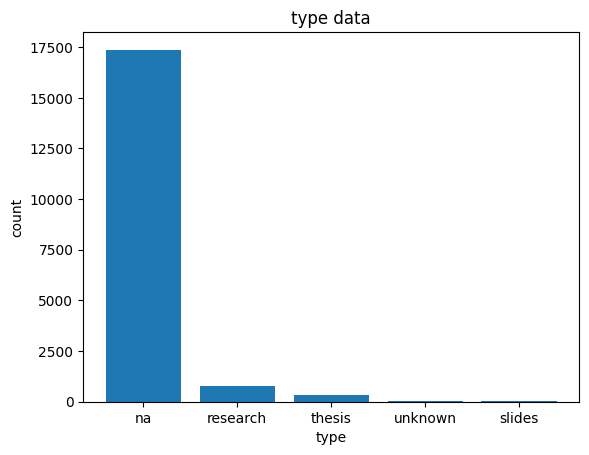

In [9]:
plot_feature("type")

What works are of "unknown" type?

In [10]:
df[df.type == "unknown"]

,title,type,citations,published_date,updated_date,text,url
id,,,,,,,
42933739,DNA adduct formation due to the gastrointestin...,unknown,None,2017-01-01T00:00:00,2021-06-25T21:31:35,\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n ...,https://core.ac.uk/download/84042579.pdf
37973996,New horizons in treatment of osteoporosis,unknown,None,2017-01-01T00:00:00,2021-06-25T21:41:23,REVIEW ARTICLE Open Access\nNew horizons in tr...,https://core.ac.uk/download/74565021.pdf
77792529,Forest genomics and biotechnology,unknown,None,2019-01-01T00:00:00,2021-06-25T22:01:57,"EDITED BY : Isabel Allona, Matias Kirst, Wout...",https://core.ac.uk/download/286549180.pdf
47068008,Transcriptomic and metabolic responses of Calo...,unknown,None,2017-12-01T00:00:00,2021-11-21T06:41:39,RESEARCH ARTICLE Open Access\nTranscriptomic a...,https://core.ac.uk/download/145643408.pdf
46228193,"Role of oxidative stress, inflammation and fib...",unknown,None,2016-12-07T02:08:16,2022-01-01T11:36:25,Boston University\nOpenBU http://open.bu.edu\n...,https://open.bu.edu/bitstream/2144/19761/1/Grz...
46229713,Bacterial strain-tracking across the human ski...,unknown,None,2017-03-24T22:08:04,2022-01-01T11:36:34,Boston University\nOpenBU http://open.bu.edu\n...,https://core.ac.uk/download/142076819.pdf
46231298,The role of environmental and endogenous AHR l...,unknown,None,2017-07-31T23:12:17,2022-01-01T11:36:51,Boston University\nOpenBU http://open.bu.edu\n...,https://core.ac.uk/download/142081488.pdf
5882046,Mejora de la Tecnología de desverdización de c...,unknown,None,2013-01-01T00:00:00,2022-01-12T18:49:15,UNIVERSIDAD POLITÉCNICA DE VALENCIA \nDEPARTAM...,https://riunet.upv.es/bitstream/10251/28213/1/...
24084445,Pharmacokinetic aspects of meloxicam in koalas...,unknown,None,2015-01-01T00:00:00,2022-02-24T14:53:15,Copyright and use of this thesis\nThis thesis ...,https://core.ac.uk/download/41241350.pdf


## Citations

Citations seem to be mostly or all `None`, making it a useless feature.

In [11]:
np.all(df.citations.isna())

True

## Dates

Convert to datetime format.

In [12]:
df["published_date"] = pd.to_datetime(df.published_date)
df["updated_date"] = pd.to_datetime(df.updated_date)

Distribution of dates.

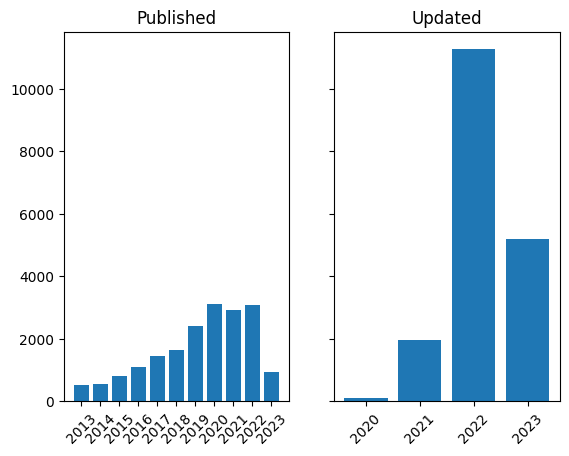

In [13]:
works_published_per_year = df.groupby(df.published_date.dt.year)["text"].count()
works_updated_per_year = df.groupby(df.updated_date.dt.year)["text"].count()
works_per_year = [works_published_per_year, works_updated_per_year]
titles = ["Published", "Updated"]

fig, axs = plt.subplots(1, len(works_per_year), sharey=True)
for i in range(len(works_per_year)):
    data = works_per_year[i]
    year, count = data.index, data.values
    axs[i].bar(year, count)
    axs[i].set_title(titles[i])
    axs[i].set_xticks(year)
    axs[i].set_xticklabels(year, rotation=45)

## Text

Works without text.

In [14]:
df.text.isna().sum()

1

In [15]:
df = df.dropna(subset="text")

Distribution of length.

In [16]:
word_counts = df.text.map(lambda x: len(x.split()))

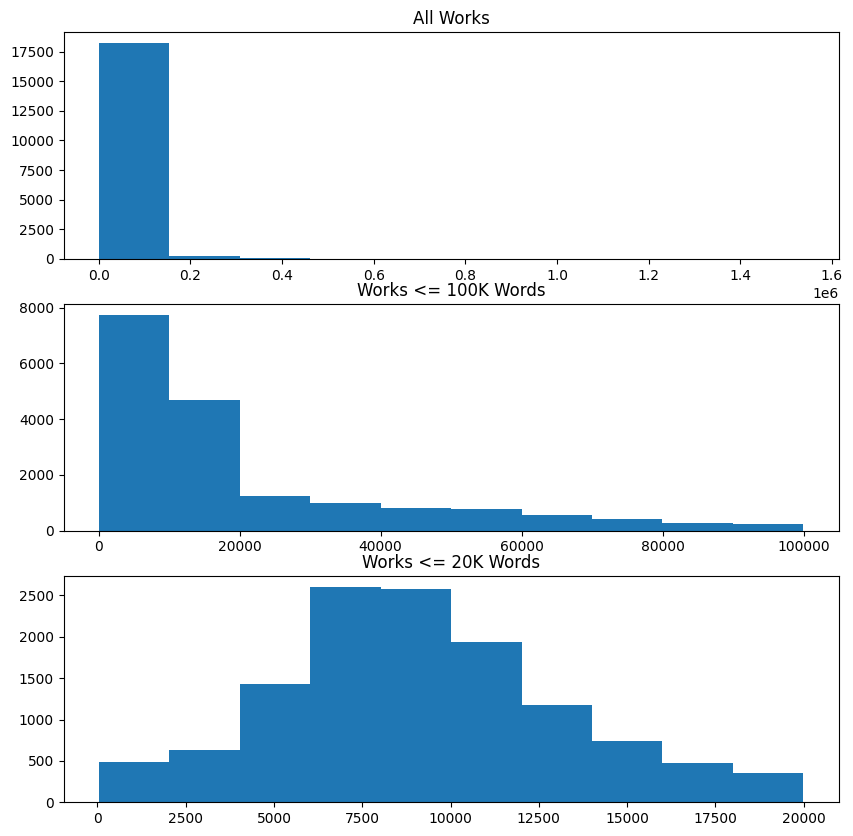

In [17]:
all_works = word_counts
medium_works = word_counts[word_counts <= 100000]
short_works = word_counts[word_counts <= 20000]
data = [all_works, medium_works, short_works]
titles = ["All Works", "Works <= 100K Words", "Works <= 20K Words"]

fig, axs = plt.subplots(len(data), 1, figsize=(10, 10))
for i in range(len(data)):
    axs[i].hist(data[i])
    axs[i].set_title(titles[i])

Mentions of "metabolomics".

Text(0, 0.5, 'Number of Works')

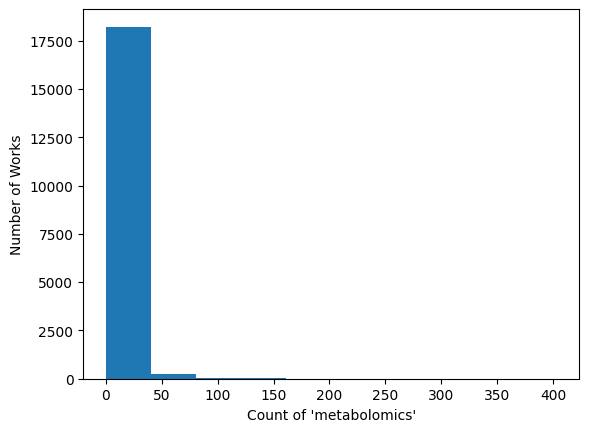

In [18]:
occurrences = df.text.map(lambda x: x.count("metabolomics"))
plt.hist(occurrences)
plt.xlabel("Count of 'metabolomics'")
plt.ylabel("Number of Works")